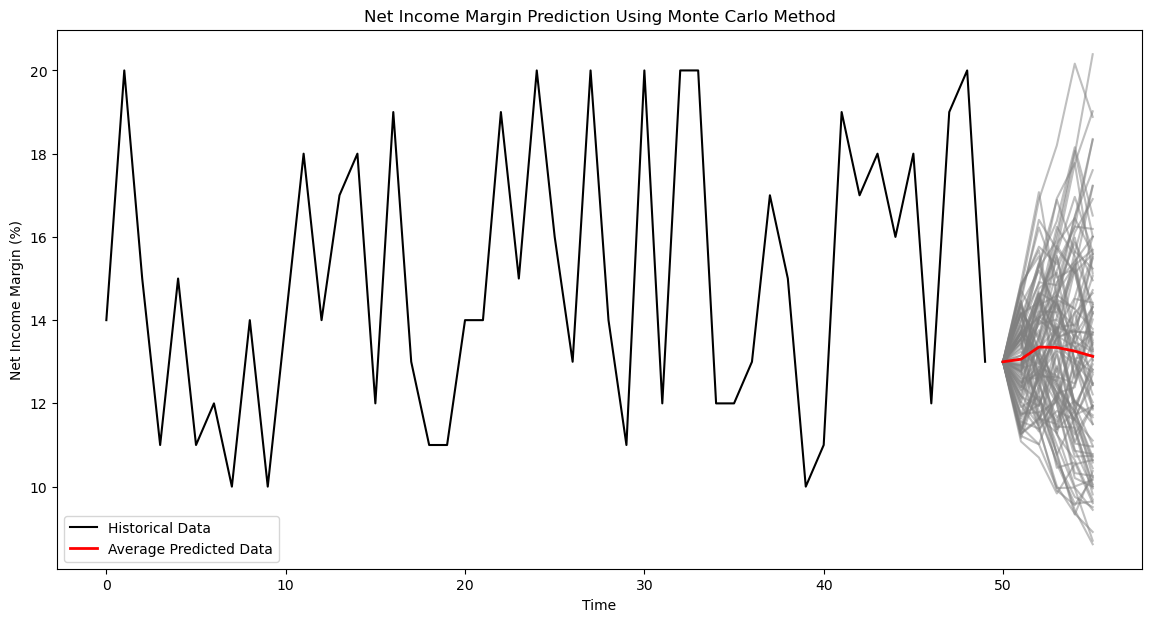

In [3]:
"""
Monte-Carlo Method to predict net income margins of company.
This program is written by Salar Delavar Ghashaghaei (Qashqai)
استفاده از روش مونت کارلو برای تخمین حاشیه سود خالص
نویسنده: سالار دلاورقشقایی
"""
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to generate random historical net income margins (percentages)
def generate_historical_data(num_days):
    return [random.randint(10, 20) for _ in range(num_days)]

# Function to simulate future net income margins using Monte Carlo method
def monte_carlo_simulation(historical_data, num_simulations, num_days, volatility, direction_bias):
    simulations = []
    for _ in range(num_simulations):
        simulation = [historical_data[-1]]
        for _ in range(num_days):
            change = random.uniform(-volatility, volatility) + direction_bias
            new_margin = simulation[-1] * (1 + change)
            simulation.append(new_margin)
        simulations.append(simulation)
    return simulations

# Generate historical data
num_days = 50
historical_data = generate_historical_data(num_days)

# Parameters for Monte Carlo simulation
num_simulations = 100
num_future_days = 5
volatility = np.mean(historical_data) * 0.01
direction_bias = 0.0001

# Run Monte Carlo simulation
simulations = monte_carlo_simulation(historical_data, num_simulations, num_future_days, volatility, direction_bias)

# Calculate average predicted margins
avg_predicted_margins = np.mean(simulations, axis=0)

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(range(num_days), historical_data, label='Historical Data', color='black')
for sim in simulations:
    plt.plot(range(num_days, num_days + num_future_days + 1), sim, color='grey', alpha=0.5)
plt.plot(range(num_days, num_days + num_future_days + 1), avg_predicted_margins, label='Average Predicted Data', color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Net Income Margin (%)')
plt.title('Net Income Margin Prediction Using Monte Carlo Method')
plt.legend()
#plt.semilogy()
plt.show()

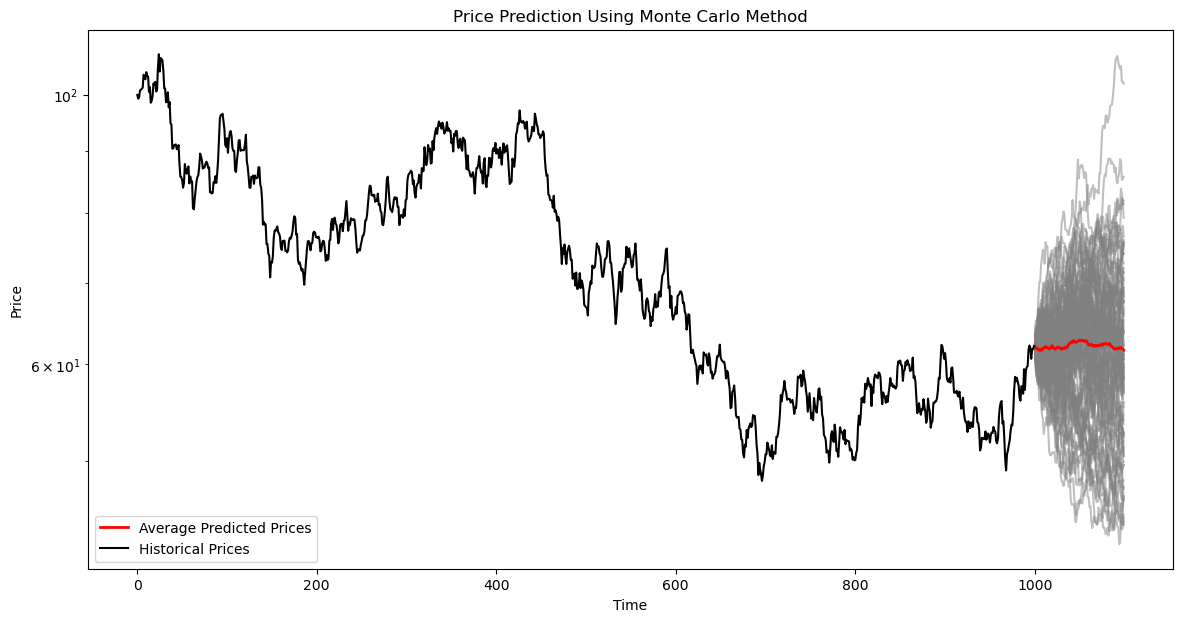

In [4]:
"""
Monte-Carlo Method to predict prices
This program is written by Salar Delavar Ghashaghaei (Qashqai)
استفاده از روش مونت کارلو برای تخمین قیمت سهام
نویسنده: سالار دلاورقشقایی
"""

import random
import numpy as np
import matplotlib.pyplot as plt

# Function to generate prices
def Generate_Prices(start_price, Volatility, Direction_Bias, num_days):
    prices = [start_price]
    changes = [0]
    for i in range(num_days-1):
        Var = random.uniform(-1, 1) * random.uniform(0, 1) * Volatility
        price = prices[-1] * (1 + Var + Direction_Bias)
        prices.append(price)
        changes.append(price / prices[-2] - 1)
    return prices, changes

# Function to generate prices
def Generate_Prices_Monte_Carlo(start_price, Volatility, Direction_Bias, num_days, num_simulations):
    all_simulations = []
    for _ in range(num_simulations):
        prices = [start_price]
        for i in range(num_days - 1):
            Var = random.uniform(-1, 1) * random.uniform(0, 1) * Volatility
            price = prices[-1] * (1 + Var + Direction_Bias)
            prices.append(price)
        all_simulations.append(prices)
    return np.array(all_simulations)
    
# Generate historical data
start_price = 100
Volatility = 0.05
Direction_Bias = 0.0001
num_days = 1000
prices, changes = Generate_Prices(start_price, Volatility, Direction_Bias, num_days)

# Generate multiple price simulations
start_price_MC = prices[-1]
#Volatility = np.quantile(changes, 0.5)
Volatility_MC = 0.05#np.mean(changes)
Direction_Bias_MC = 0.0001
num_days_MC = 100
num_simulations = 100
simulated_prices = Generate_Prices_Monte_Carlo(start_price_MC, Volatility_MC, Direction_Bias_MC, num_days_MC, num_simulations)

# Calculate average predicted prices
avg_predicted_prices = np.mean(simulated_prices, axis=0)

# Plot results
plt.figure(figsize=(14, 7))
for i in range(num_simulations):
    plt.plot(range(len(prices), len(prices) + len(simulated_prices[i])), simulated_prices[i], color='grey', alpha=0.5)
plt.plot(range(len(prices), len(prices) + len(avg_predicted_prices)), avg_predicted_prices, label='Average Predicted Prices', color='red', linewidth=2)
plt.plot(range(len(prices)), prices, label='Historical Prices' ,color='black')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price Prediction Using Monte Carlo Method')
plt.legend()
plt.semilogy()
plt.show()
